# Exercises

1) Try to build a classifier for MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task.) You just need to find a good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters.)

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

X,y = mnist['data'], mnist['target']
print('X shape:',X.shape)
print('y shape:',y.shape)

#There are 70,000 images and each image has 784 features. This is because each image is
#28 x 28 pixels and each feature simply represents one pixel's intensity from 0 to 255

X shape: (70000, 784)
y shape: (70000,)


In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Split Train-Test Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, stratify = y)

In [9]:
#Create KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[2,3,4,5,8], 'weights':('uniform', 'distance')}
kn_clf = KNeighborsClassifier(n_jobs= -1)
clf = GridSearchCV(kn_clf, parameters, verbose = 3)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=2, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=2, weights=uniform, score=0.963, total= 3.0min
[CV] n_neighbors=2, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] ...... n_neighbors=2, weights=uniform, score=0.961, total= 2.9min
[CV] n_neighbors=2, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.9min remaining:    0.0s


[CV] ...... n_neighbors=2, weights=uniform, score=0.963, total= 2.6min
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.960, total= 2.7min
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.964, total= 2.6min
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.970, total= 2.6min
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.965, total= 2.6min
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.968, total= 2.7min
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.968, total= 2.6min
[CV] n_neighbors=2, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 130.5min finished


GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [2, 3, 4, 5, 8],
                         'weights': ('uniform', 'distance')},
             verbose=3)

In [11]:
clf.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [12]:
clf.best_score_

0.9709333333333333

In [13]:
clf.score(X_test,y_test) 

0.9756

2) Write a function that can shift an MNIST image in any direction (left, right, up, or down) bt one pixel. Then for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called "data augmentation" or "training set expansion".

Note: You can use shift() function from the scipy.ndimage.interpolation module. For example shift(image,[2,1], cval=0) shifts the image two pixel down an one pixel to the right.

In [72]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx=-1, dy=0):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

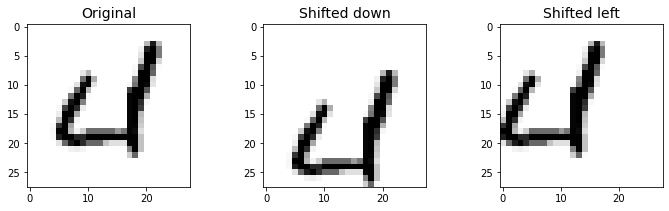

In [76]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [79]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [80]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [85]:
#Create KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kn_clf = KNeighborsClassifier(n_neighbors= 4,weights='distance', n_jobs= -1)
kn_clf.fit(X_train_augmented,y_train_augmented)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [87]:
y_pred = kn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

NameError: name 'accuracy_score' is not defined

3) Tackle the Titanic dataset. A great place to start is on Kaggle (https://www.kaggle.com/c/titanic).

In [1]:
#I reached %78 accuracy on titanic competition.

4) Build a spam classifier (a more challenging exercise):
* Download examples of spam and ham from Apache Spam Assasins's datasets (https://homl.info/spamassasin)
* Unzip the datasets and familiarize yourself with the data format
* Split the datasets into a training set and a test set.
* Write a data preparation pipeline to convert each email into a feature vector.
Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, "Hello", "how", "are", "you" then the email then the email "Hello you Hello Hello you" would be converted into vector [1,0,0,1] (meaning ["Hello" is present, "how" is absent, "are" is absent, "you" is present]) or [3,0,0,2] if you prefer to count the number of occurrences of each word.

You may want to add hyperparameters to your preparation pipeline to control whether or not strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with "URL" replace all numbers with "NUMBER" or even perform stemming (i.e trim off word endings; there are Python libraries available to do this)

Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.